# **Titanic Data Analysis**

**Problem Statement:**

This assignment aims to perform data visualization on the Titanic dataset using Matplotlib and
 Seaborn libraries. By exploring the dataset visually,we are expected to gain insights into
 the characteristics of the data and derive meaningful interpretations

**Objective**:

To extract actionable insights around demand patterns across various factors.

**Key questions**:

 1. What is the distribution of passenger ages on the Titanic?
 2. How does the survival rate vary based on passenger class (Pclass)?
 3. Is there a relationship between the fare paid and the likelihood of survival?
 4. How does the survival rate differ between male and female passengers?
 5. What impact does the number of siblings/spouses (SibSp) or parents/children
 (Parch) aboard have on survival?
 6. Are there any significant differences in survival rates among passengers embarked
 from different ports?


**Dataset Description**:

PassergerID: Unique id of the passengers

Survival: survival (0=No; 1=Yes)

pclass: Passenger class (1st=1; 2nd=2; 3rd=3)

Name: Name of the passenger

sex: Gender of the passenger

Age: Age of the passengers

sibsp: Siblings or Spouse Aboard

parch: Parent or Children Aboard

Ticket: Ticket number

Fare: Price

cabin: Cabin of the passenger

Embarked:  Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


# **Importing necessary libraries and overview of the data**

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

**Loading dataset**

In [2]:
df=pd.read_csv('/content/Titanic.csv')

In [3]:
df.head()   # first 5 rows of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()  # last 5 rows of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape  # shape of the data

(891, 12)



 Observations:
 * There are 891 rows and 12 columns in the dataset




#Checking the info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Observations:**


* All columns have 891 observations except Age and Cabin column
* Age column and Cabin column has null values.
* Data type of age column is float64, it should be int64.




#**Summary of the data**

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Observations:**
* There is a significant discrepancy between the third quartile and the highest value for the Age column, indicating that this variable may have outliers to the right.


In [8]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Observations:**

*Highest number of passengers that is more than 50% embarked, are from S-Southampton



#**Handling Missing Values**

In [9]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [10]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [11]:
# fill the null values of cabin with its previous value
df['Cabin']=df['Cabin'].ffill()

In [12]:
df['Cabin'].isnull().sum()

1

In [13]:
df['Cabin'].nunique()

147

In [14]:
df['Cabin']=df['Cabin'].fillna('C85')

In [15]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [16]:
#fill null values for Embarked column
df['Embarked']=df['Embarked'].ffill()

In [17]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [18]:
# Fill null values for age column

df['Age'] = df['Age'].fillna(df['Age'].median())
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


* Now, there are no missing values in the data

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S


In [20]:
# drop the passengerId and name column as they will be of no use for further Analysis
df.drop(['PassengerId','Name'],axis=1,inplace=True)

In [21]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,C85,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C


**converting Age data type from float to integer**

In [22]:
df['Age']=df['Age'].astype(int)

In [23]:
df['Age'].dtype

dtype('int64')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     891 non-null    object 
 9   Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 69.7+ KB


# **Exploratory data Analysis**

# **Univariate**

<Axes: xlabel='Sex'>

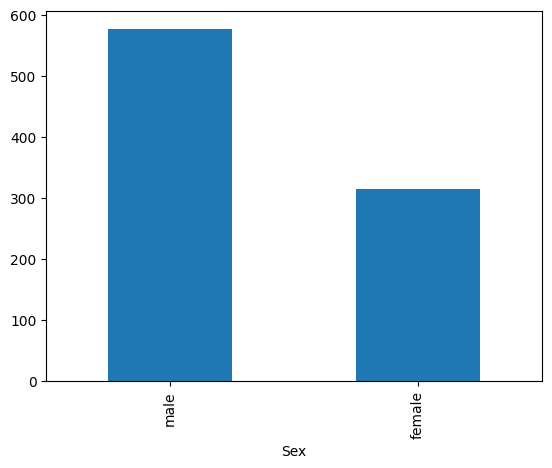

In [25]:
df['Sex'].value_counts().plot(kind='bar')

**Obseervation:**
* There are more male passengers compare to female passengers.

<Axes: ylabel='Frequency'>

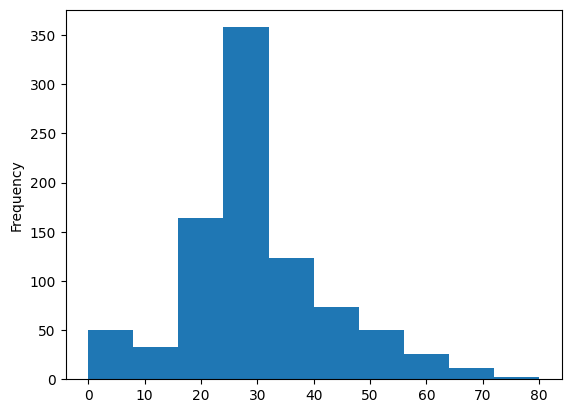

In [26]:
df['Age'].plot(kind='hist')

**observations:**

* The distribution of age is right-skewed.

<Axes: ylabel='Age'>

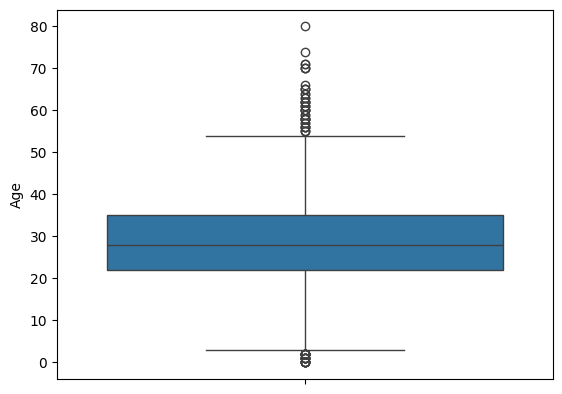

In [27]:
sns.boxplot(df['Age'])

**Observation:**

* There are outliers in the Age column.
* The mean age of the passengers is around 28.
* The data is between 22-36, indicating that most of the passengers are between the age 22-36.


<Axes: ylabel='Age'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 18.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


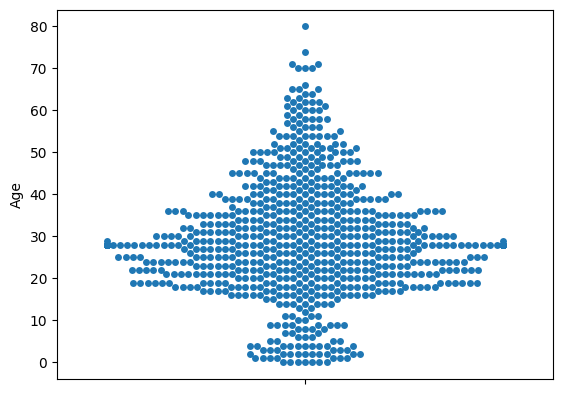

In [28]:
 #swarm plot for age column

sns.swarmplot(df['Age'])


**Observations:**
* The data points for age is dense between 18-38, indicating that more passengers are from these age group.


<ipython-input-29-6aede993a0ca>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],color='red')


<Axes: xlabel='Age', ylabel='Density'>

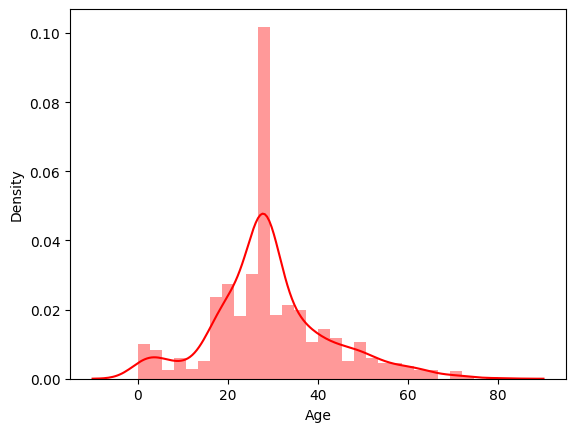

In [29]:
# dist plot for age group

sns.distplot(df['Age'],color='red')


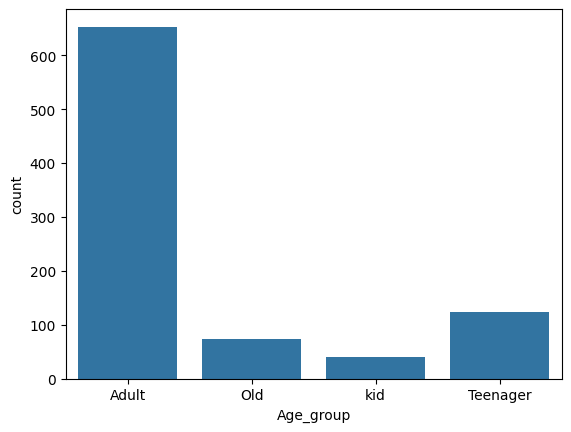

In [30]:
def age_group_func(age):  # Define a function to categorize age groups
    if age < 5:
        return 'kid'
    elif age < 20:
        return "Teenager"
    elif age < 50:
        return 'Adult'
    else:
        return 'Old'

df['Age_group'] = df['Age'].apply(age_group_func)  # Apply the function

sns.countplot(x=df['Age_group'])
plt.show()  # Display the plot

In [31]:
df['Age_group'].value_counts()

,count
Age_group,
Adult,653
Teenager,124
Old,74
kid,40


In [32]:
df['Age_group'].value_counts().sum()

891

**Observation:**

* The above countplot shows the detailed age distribution of passengers.
* The data was rightly skewed because the old passengers are very less compare to adults.

<Axes: ylabel='count'>

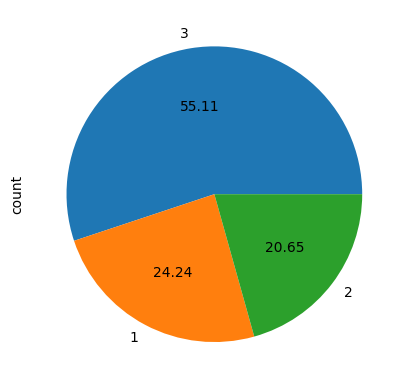

In [33]:
# pie chart for pclass

df['Pclass'].value_counts().plot(kind='pie',autopct='%.2f')


**Obervations:**

* The pie chart shows the distribution of Passenger class.
* It shows 55% of passengers are travelling in 3rd class.
* The lowest number of passengers are travelling in 2nd class,i.e, 20.65%.

In [34]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,169
Q,78


<Axes: ylabel='count'>

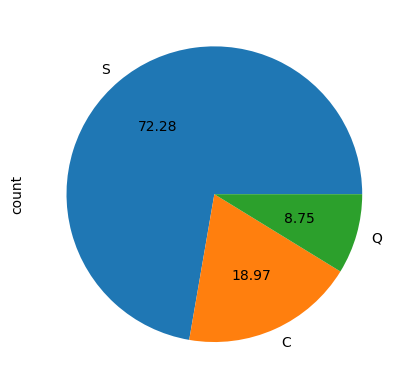

In [35]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%.2f')

**Observation:**

* The above piechart for Embarked column shows that the highest number of passengers embarked from Southampton.
* The lowest number of passengers embarked from Queenstown

In [36]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


<Axes: ylabel='count'>

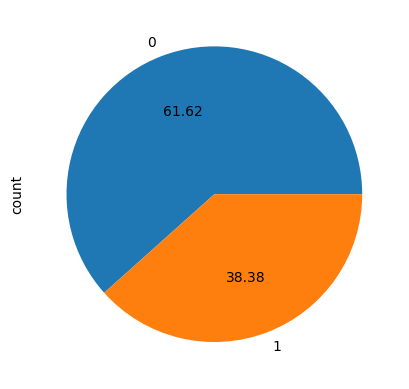

In [37]:
df['Survived'].value_counts().plot(kind='pie',autopct='%.2f')

**Observations:**

* The percentage of survivals is less compared to not survived.

#**Bivariate Analysis**

<Axes: xlabel='Sex', ylabel='count'>

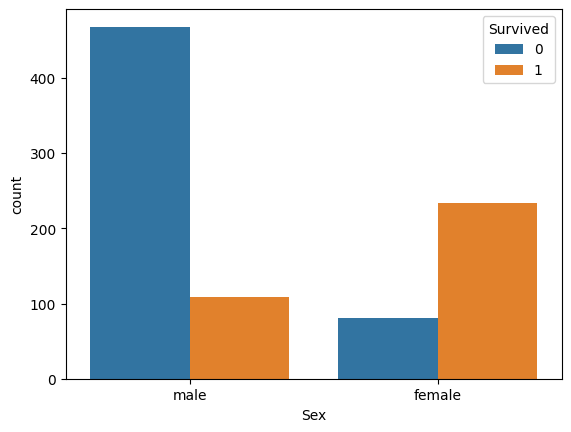

In [66]:
sns.countplot(data=df,x='Sex',hue='Survived')

**Observations:**

* The survival rate of females is significantly high compare to males.

<Axes: xlabel='Pclass', ylabel='Survived'>

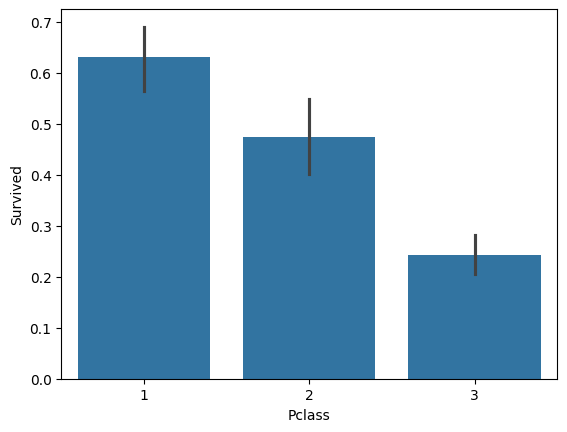

In [38]:
sns.barplot(x='Pclass',y='Survived',data=df)

**Observations:**

* There is no significant difference between Pclass 1 and 2 survival rate.

In [39]:
Class_survived=df.groupby('Pclass')['Survived'].value_counts()

In [40]:
Class_survived

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

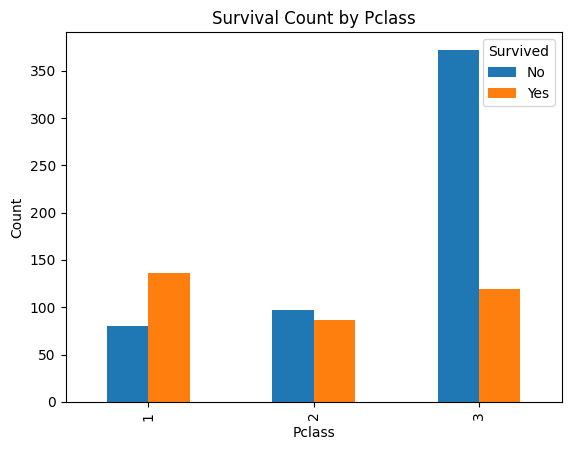

In [41]:
Class_survived.unstack().plot(kind='bar', stacked=False)
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Survival Count by Pclass')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


**Observation:**

* For passenger class 1 and 2 there is less difference between the passengers survived and not survived, whereas for class 3 passengers survived are significantly less compared to not survived.

<Axes: xlabel='Survived', ylabel='Fare'>

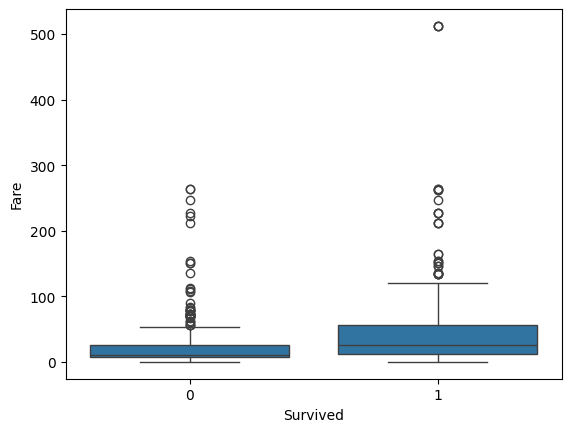

In [42]:
# prompt: Suggest a plot between fare and survival column to the relationship

sns.boxplot(x='Survived',y='Fare',data=df)


**Observation:**
 * The median fare for survived passengers is higher than not survived passengers.
 * The fare for not survived passengers is dense between 0-20, indicating most of the passengers who did not survive paid less fare.
 * There are outliers in fare for survived as well as not survived passengers, indicating few passengers paid high fare and not survived and viceversa.


<Axes: xlabel='Survived', ylabel='Fare'>

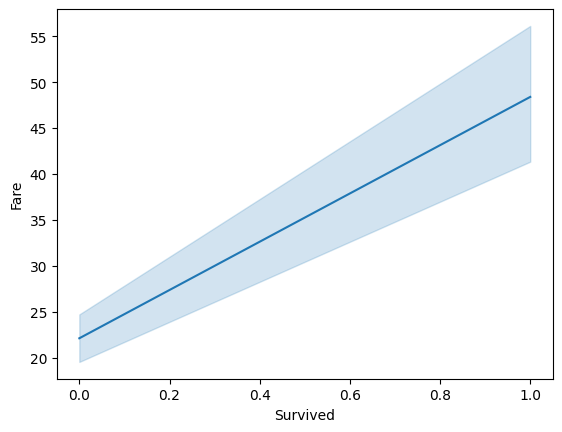

In [43]:
sns.lineplot(x='Survived',y='Fare',data=df)

**Observation:**
* The line plot indicates as the fare increases the chance of survival also increases.
* However, the above boxplot shows there are outliers.

In [46]:
sibsp_survived=df.groupby('SibSp')['Survived'].value_counts()

Text(0, 0.5, 'Count')

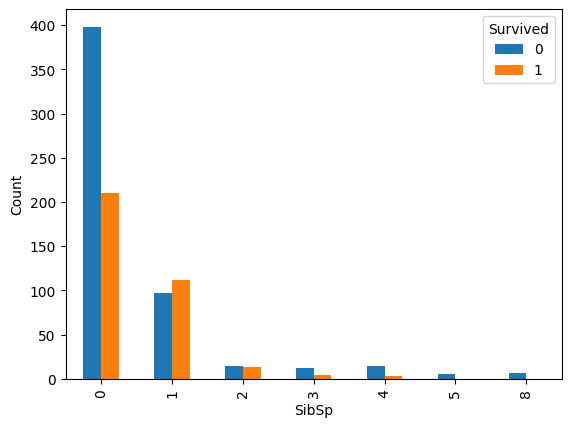

In [50]:
sibsp_survived.unstack().plot(kind='bar', stacked=False)
plt.xlabel('SibSp')
plt.ylabel('Count')

**Observations:**

 * Passengers with 0 sibsp have around 50% of survival rate.
 * Passengers with 1 SibSp have higher survival rate compare to other SibSp.
 * Passengers with 5 SibSp did not survive.
 * Passengers with more SibSp have very less survival rate.

In [48]:
Parch_survived=df.groupby('Parch')['Survived'].value_counts()

Text(0, 0.5, 'Count')

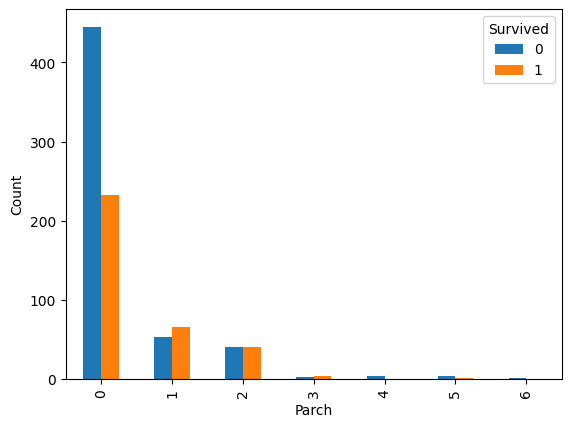

In [51]:
Parch_survived.unstack().plot(kind='bar', stacked=False)
plt.xlabel('Parch')
plt.ylabel('Count')

**Observations:**

* The passengers with 0 parch have less survival rate.
* The passengers with 1, 2 parch have more survival rate.
* The passengers with 4 or more parch have very less survival rate.

In [52]:
Embarked_survived=df.groupby('Embarked')['Survived'].value_counts()

In [53]:
Embarked_survived

Embarked  Survived
C         1            94
          0            75
Q         0            47
          1            31
S         0           427
          1           217
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

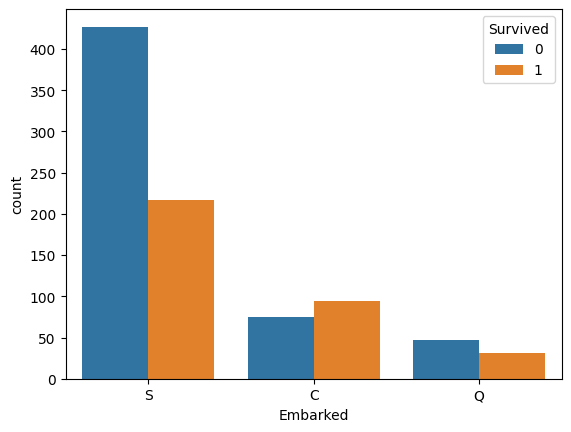

In [56]:
sns.countplot(x='Embarked',hue='Survived',data=df)


**Observations:**

* The survival rate for passengers embarked from Cherbourg is high.
* The survival rate for passengers embarked from southampton is less

# **Multivatiate Analysis**

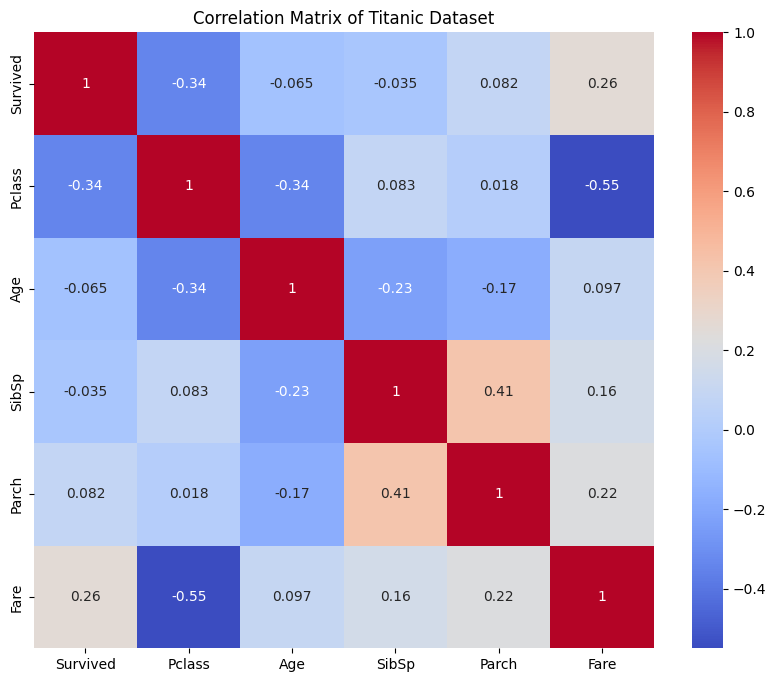

In [58]:
# Heatmap to show correlation between features
numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()


**Observations:**

- There's a positive correlation between Fare and Survived (0.26), suggesting that passengers who paid higher fares were more likely to survive.
- There's a negative correlation between Pclass and Survived (-0.34), indicating that passengers in lower classes (higher Pclass values) had lower survival rates.
- There's a negative correlation between Pclass and Fare (-0.55), showing that higher class passengers (lower Pclass values) generally paid higher fares.
- Parch and SibSp also show a positive correlation (0.41), indicating that passengers with more parents/children aboard were also more likely to have siblings/spouses aboard.

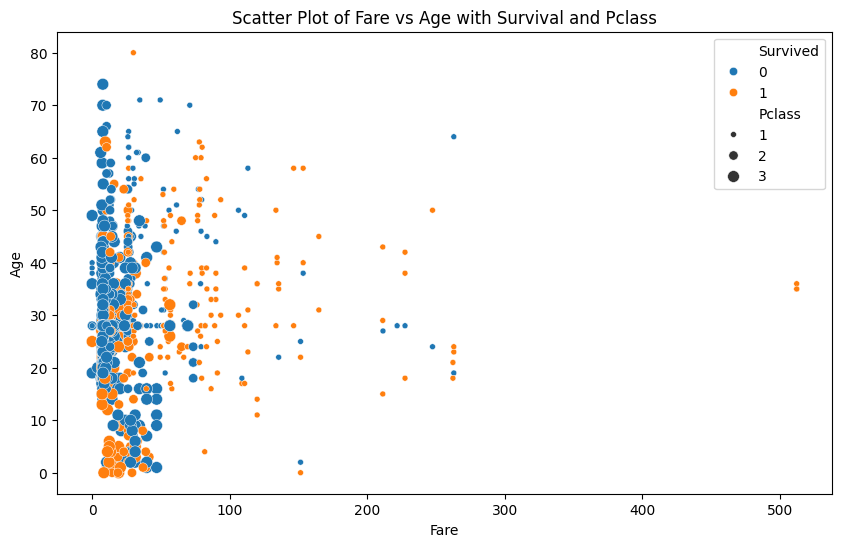

In [59]:
# Scatter plot with hue for survival and size for age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fare', y='Age', hue='Survived', size='Pclass', data=df)
plt.title('Scatter Plot of Fare vs Age with Survival and Pclass')
plt.show()

**Observations:**

* The scatter plot visualizes the relationship between Fare and Age, with the color indicating whether the passenger Survived (0 = No, 1 = Yes)
 and the size of the point representing the Pclass (1 = 1st, 2 = 2nd, 3 = 3rd).
* There is a noticeable difference in survival rates based on Fare. Passengers who paid higher fares generally had a better chance of survival.
* The size of the points reveals that passengers in higher classes (smaller Pclass values) tended to be older and pay higher fares.
* There are some outliers, such as younger passengers who paid high fares and did not survive, and older passengers who paid lower fares and survived.

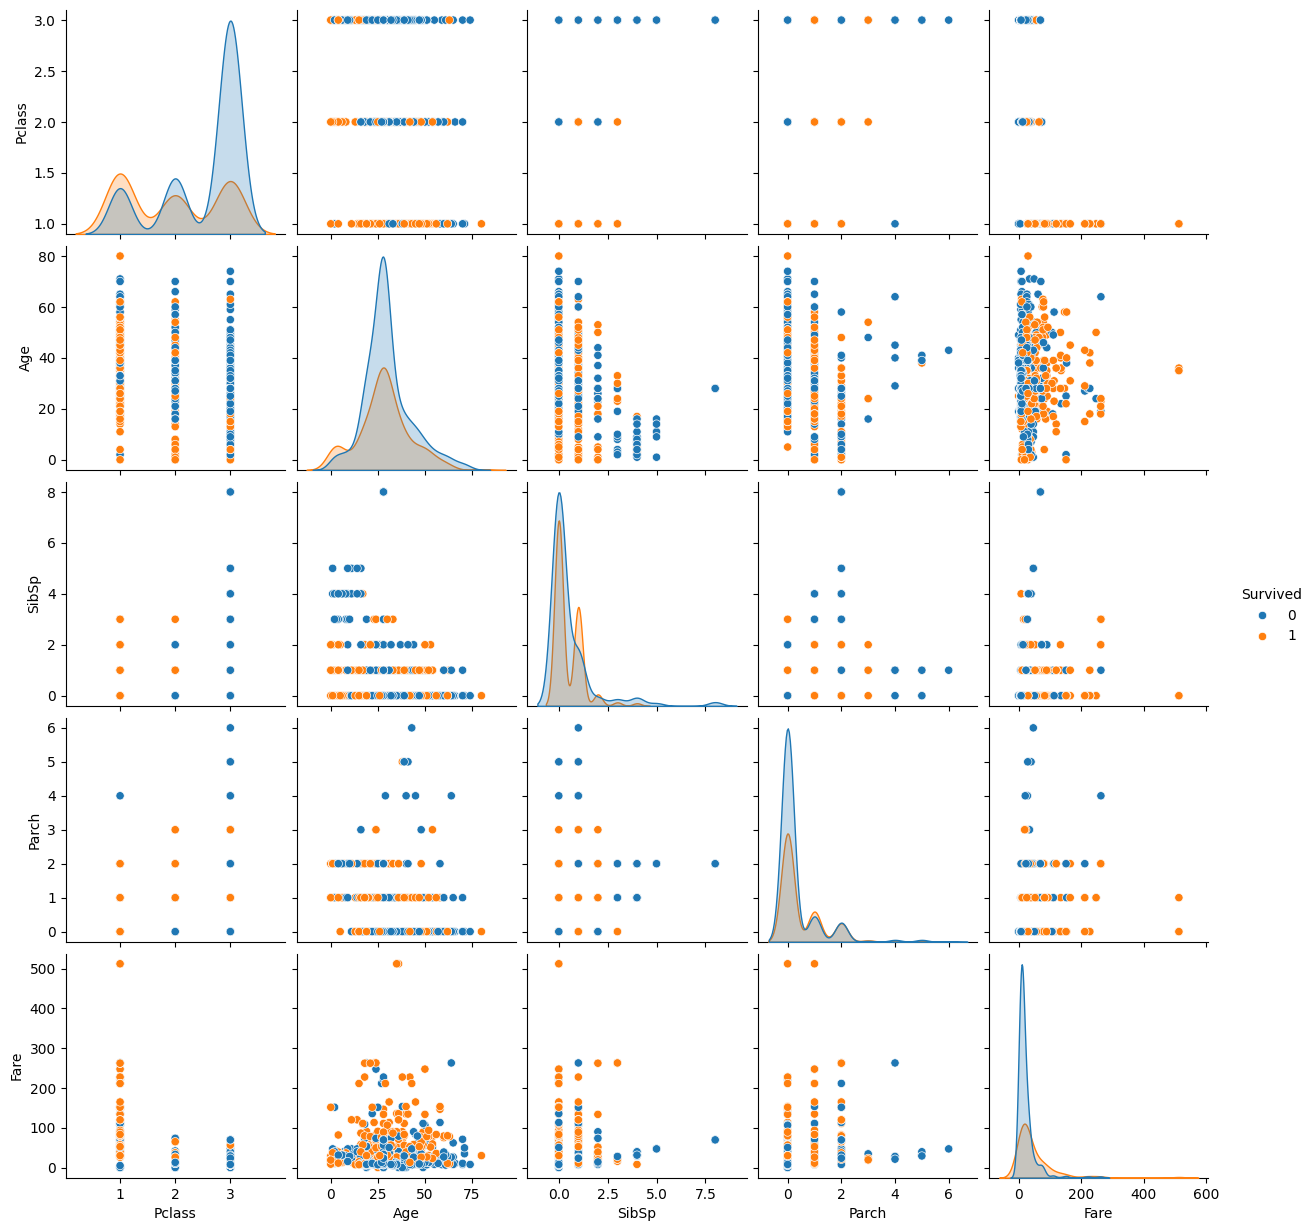

In [61]:
# Pairplot to visualize relationships between multiple variables
plt.figsize=(10,6)
sns.pairplot(df, hue='Survived')
plt.show()

**Observations:**

* Survived and Fare: Passengers who paid higher fares had a better chance of survival, as indicated by the denser concentration of survived passengers (orange) in the higher fare ranges.
* Survived and Pclass: Lower class passengers (higher Pclass values) had a lower survival rate, as seen by the higher concentration of non-survived passengers (blue) in the higher Pclass ranges.

# **Conclusions**

* The passengers aboard are more from age group 18-38 that is adults.
* The survival rate of females is significantly high compare to males.
* The passengers from higher class (lower pclass value) have higher chances of survival than lower class passengers.
* The passenger who have paid higher fare are more likely to travel in higher pclass(lower pclass vale).Hence, they have higher survival rate.
* Passengers with 1 sibap/parch on board have significantly more chances of survival.
* More number of passengers embarked are from southampton.
* Passengers embarked from cherburg have higher survival rate.